In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Energy Consumption prediction\Electricity consumption.csv")
data.sample(5)

,Unnamed: 0,Start time UTC,End time UTC,Electricity consumption in Odisha,Start time IST UTC+05:30,End time IST UTC+05:30
3107,3107,2016-05-09 14:00:00,2016-05-09 15:00:00,8387.0,2016-05-09 19:30:00,2016-05-09 20:30:00
50856,50856,2021-10-04 23:00:00,2021-10-05 00:00:00,7618.0,2021-10-05 04:30:00,2021-10-05 05:30:00
42939,42939,2020-11-09 02:00:00,2020-11-09 03:00:00,8399.0,2020-11-09 07:30:00,2020-11-09 08:30:00
23931,23931,2018-09-23 12:00:00,2018-09-23 13:00:00,8264.0,2018-09-23 17:30:00,2018-09-23 18:30:00
33483,33483,2019-10-12 22:00:00,2019-10-12 23:00:00,8460.0,2019-10-13 03:30:00,2019-10-13 04:30:00


In [10]:
data = data.drop(columns=['Unnamed: 0'])

In [11]:
data

,Start time UTC,End time UTC,Electricity consumption in Odisha,Start time IST UTC+05:30,End time IST UTC+05:30
0,2015-12-31 21:00:00,2015-12-31 22:00:00,10800.0,2016-01-01 02:30:00,2016-01-01 03:30:00
1,2015-12-31 22:00:00,2015-12-31 23:00:00,10431.0,2016-01-01 03:30:00,2016-01-01 04:30:00
2,2015-12-31 23:00:00,2016-01-01 00:00:00,10005.0,2016-01-01 04:30:00,2016-01-01 05:30:00
3,2016-01-01 00:00:00,2016-01-01 01:00:00,9722.0,2016-01-01 05:30:00,2016-01-01 06:30:00
4,2016-01-01 01:00:00,2016-01-01 02:00:00,9599.0,2016-01-01 06:30:00,2016-01-01 07:30:00
...,...,...,...,...,...
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,11447.0,2021-12-31 21:30:00,2021-12-31 22:30:00
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,11237.0,2021-12-31 22:30:00,2021-12-31 23:30:00
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,10914.0,2021-12-31 23:30:00,2022-01-01 00:30:00
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,10599.0,2022-01-01 00:30:00,2022-01-01 01:30:00


In [12]:
# Drop the specified columns
del data["Start time UTC"]
del data["End time UTC"]
del data["Start time IST UTC+05:30"]

# Rename columns with exact names
data.rename(columns={"End time IST UTC+05:30": "DateTime",
                     "Electricity consumption in Odisha ": "Consumption"}, inplace=True)

# Display the first few rows to verify the changes
print(data.head(5))

   Electricity consumption in Odisha             DateTime
0                            10800.0  2016-01-01 03:30:00
1                            10431.0  2016-01-01 04:30:00
2                            10005.0  2016-01-01 05:30:00
3                             9722.0  2016-01-01 06:30:00
4                             9599.0  2016-01-01 07:30:00


In [13]:
dataset = data
dataset["Month"] = pd.to_datetime(data["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(data["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(data["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(data["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(data["DateTime"]).dt.weekday
dataset["Day"] = pd.to_datetime(data["DateTime"]).dt.day_name()
dataset = data.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [14]:
dataset[69:75]

,Electricity consumption in Odisha,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04 00:30:00,11756.0,1,2016,2016-01-04,00:30:00,0,Monday
2016-01-04 01:30:00,11475.0,1,2016,2016-01-04,01:30:00,0,Monday
2016-01-04 02:30:00,11721.0,1,2016,2016-01-04,02:30:00,0,Monday
2016-01-04 03:30:00,11626.0,1,2016,2016-01-04,03:30:00,0,Monday
2016-01-04 04:30:00,11253.0,1,2016,2016-01-04,04:30:00,0,Monday
2016-01-04 05:30:00,10925.0,1,2016,2016-01-04,05:30:00,0,Monday


In [15]:
dataset[69:-123]

,Electricity consumption in Odisha,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04 00:30:00,11756.0,1,2016,2016-01-04,00:30:00,0,Monday
2016-01-04 01:30:00,11475.0,1,2016,2016-01-04,01:30:00,0,Monday
2016-01-04 02:30:00,11721.0,1,2016,2016-01-04,02:30:00,0,Monday
2016-01-04 03:30:00,11626.0,1,2016,2016-01-04,03:30:00,0,Monday
2016-01-04 04:30:00,11253.0,1,2016,2016-01-04,04:30:00,0,Monday
...,...,...,...,...,...,...,...
2021-12-26 19:30:00,12212.0,12,2021,2021-12-26,19:30:00,6,Sunday
2021-12-26 20:30:00,12495.0,12,2021,2021-12-26,20:30:00,6,Sunday
2021-12-26 21:30:00,12550.0,12,2021,2021-12-26,21:30:00,6,Sunday


In [16]:
dataset=dataset[69:-123]

C:\Users\alisa\AppData\Local\Temp\ipykernel_18440\2607008584.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


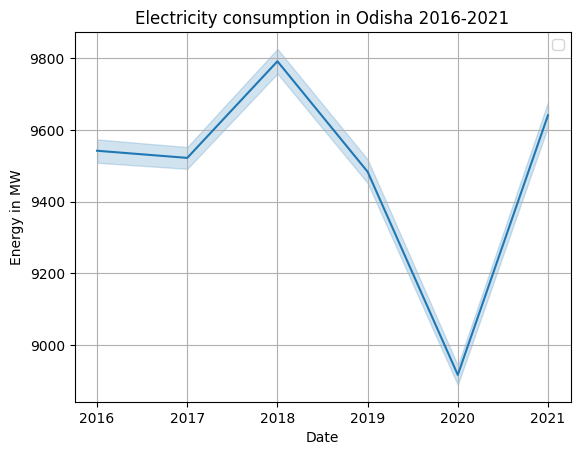

In [17]:
sns.lineplot(data = dataset , x=dataset['Year'] , y=dataset['Electricity consumption in Odisha'])
plt.title("Electricity consumption in Odisha 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

In [18]:
dataset.sample(5)

,Electricity consumption in Odisha,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-12-10 18:30:00,11160.0,12,2016,2016-12-10,18:30:00,5,Saturday
2021-03-29 12:30:00,10732.0,3,2021,2021-03-29,12:30:00,0,Monday
2016-08-08 17:30:00,8691.0,8,2016,2016-08-08,17:30:00,0,Monday
2016-08-04 23:30:00,8558.0,8,2016,2016-08-04,23:30:00,3,Thursday
2017-03-29 15:30:00,10596.0,3,2017,2017-03-29,15:30:00,2,Wednesday


In [20]:
dataset.shape

(52774, 7)

In [21]:
train = dataset.iloc[:15833]
test = dataset.iloc[15833:]

In [23]:
print(train)
print("--------------------------")
print(test)

                     Electricity consumption in Odisha  Month  Year  \
DateTime                                                              
2016-01-04 00:30:00                            11756.0      1  2016   
2016-01-04 01:30:00                            11475.0      1  2016   
2016-01-04 02:30:00                            11721.0      1  2016   
2016-01-04 03:30:00                            11626.0      1  2016   
2016-01-04 04:30:00                            11253.0      1  2016   
...                                                ...    ...   ...   
2017-10-23 21:30:00                            11244.0     10  2017   
2017-10-23 22:30:00                            11323.0     10  2017   
2017-10-23 23:30:00                            11150.0     10  2017   
2017-10-24 00:30:00                            10948.0     10  2017   
2017-10-24 01:30:00                            10911.0     10  2017   

                           Date      Time  Week      Day  
DateTime         

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()# use to convet the data in the scale of 0-1

In [25]:
# Select only numeric columns to scale
numeric_columns = ['Electricity consumption in Odisha']
train_numeric = train[numeric_columns]
test_numeric = test[numeric_columns]

# Fit the scaler on training data and transform both train and test data
scaler.fit(train_numeric)
scaled_train = scaler.transform(train_numeric)
scaled_test = scaler.transform(test_numeric)


In [26]:
scaled_train[:10]

array([[0.64791842],
       [0.61837679],
       [0.64423886],
       [0.63425147],
       [0.59503785],
       [0.56055509],
       [0.53521867],
       [0.52870059],
       [0.54299832],
       [0.58568124]])